In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "/content/ipl_2025_auction_players.csv"
df = pd.read_csv(file_path)

In [3]:
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Players  623 non-null    object
 1   Team     623 non-null    object
 2   Type     623 non-null    object
 3   Base     623 non-null    object
 4   Sold     623 non-null    object
dtypes: object(5)
memory usage: 24.5+ KB
            Players Team  Type Base   Sold
0       Virat Kohli  RCB   BAT    -  21.00
1     Rajat Patidar  RCB   BAT    -  11.00
2        Yash Dayal  RCB  BOWL    -   5.00
3    Jasprit Bumrah   MI  BOWL    -  18.00
4  Suryakumar Yadav   MI   BAT    -  16.35


In [4]:
# Data Cleaning
# Converting 'Sold' column to numeric format
df['Sold'] = pd.to_numeric(df['Sold'], errors='coerce')

In [5]:
# Removing unnecessary symbols from 'Base' and convert to numeric
df['Base'] = df['Base'].replace('-', np.nan)
df['Base'] = pd.to_numeric(df['Base'], errors='coerce')

In [7]:
# Checking for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Players      0
Team         0
Type         0
Base        46
Sold       396
dtype: int64


In [8]:
# Filling missing base prices with median value
df['Base'].fillna(df['Base'].median(), inplace=True)

<ipython-input-8-a3fa3050998c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Base'].fillna(df['Base'].median(), inplace=True)


<ipython-input-9-fb321e6e9363>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.nlargest(10, 'Sold')['Players'], y=df.nlargest(10, 'Sold')['Sold'], palette='coolwarm')


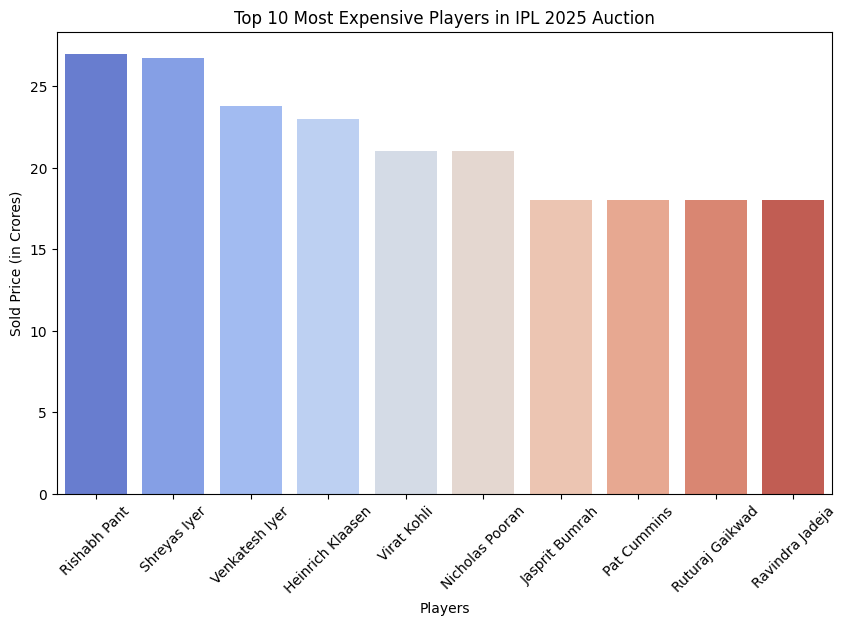

In [9]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.barplot(x=df.nlargest(10, 'Sold')['Players'], y=df.nlargest(10, 'Sold')['Sold'], palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel("Players")
plt.ylabel("Sold Price (in Crores)")
plt.title("Top 10 Most Expensive Players in IPL 2025 Auction")
plt.show()

<ipython-input-10-cb5cb284e8f3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_spending.index, y=team_spending.values, palette='viridis')


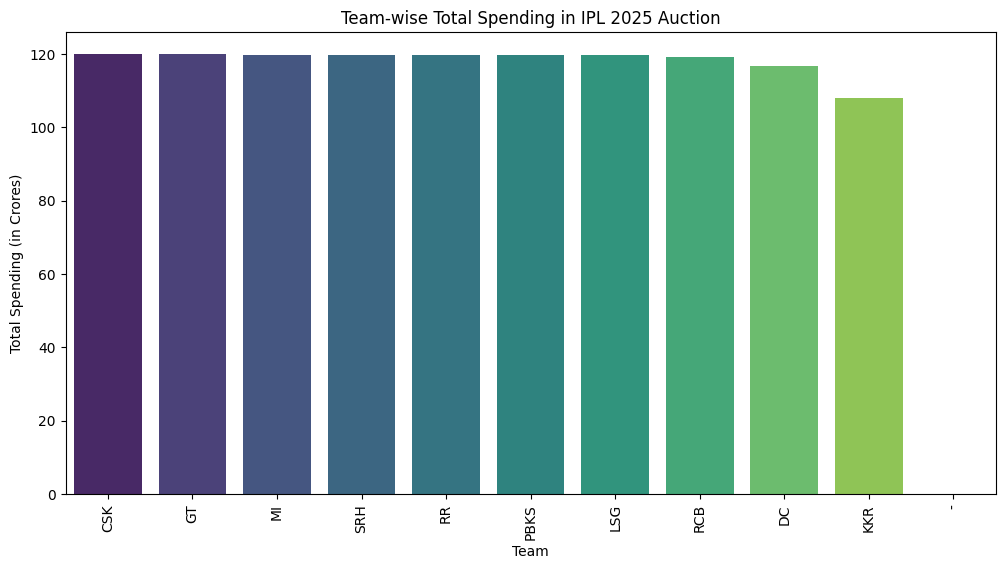

In [10]:
# Team-wise Total Spending
team_spending = df.groupby('Team')['Sold'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=team_spending.index, y=team_spending.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("Team")
plt.ylabel("Total Spending (in Crores)")
plt.title("Team-wise Total Spending in IPL 2025 Auction")
plt.show()

<ipython-input-11-467b0dd5a11c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Type'], palette='pastel')


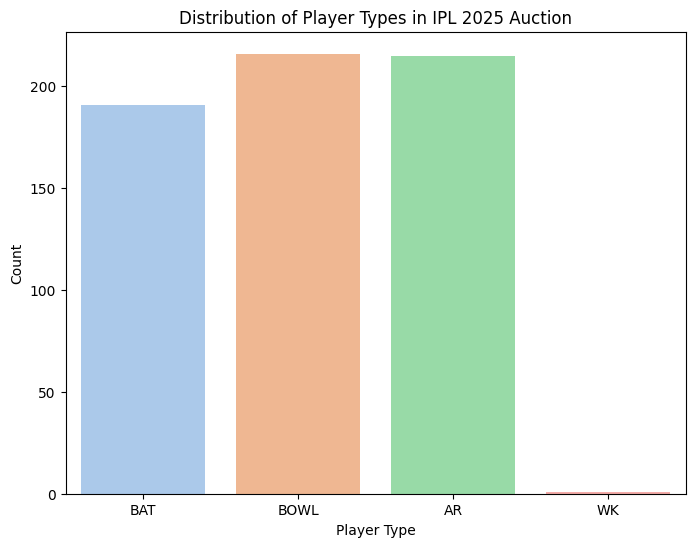

In [11]:
# Player Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Type'], palette='pastel')
plt.xlabel("Player Type")
plt.ylabel("Count")
plt.title("Distribution of Player Types in IPL 2025 Auction")
plt.show()

In [17]:
# Finding Costliest and Cheapest Players for Each Team
costliest_cheapest = {}
for team in teams:
    team_players = df[df['Team'] == team]
    costliest = team_players.nlargest(1, 'Sold')[['Players', 'Sold']]
    cheapest = team_players.nsmallest(1, 'Sold')[['Players', 'Sold']]
    costliest_cheapest[team] = {
        'Costliest Player': costliest.to_dict(orient='records')[0],
        'Cheapest Player': cheapest.to_dict(orient='records')[0]
    }

for team, data in costliest_cheapest.items():
    print(f"\n{team}:")
    print("Costliest Player:", data['Costliest Player'])
    print("Cheapest Player:", data['Cheapest Player'])


RCB:
Costliest Player: {'Players': 'Virat Kohli', 'Sold': 21.0}
Cheapest Player: {'Players': 'Swastik Chikara', 'Sold': 0.3}

MI:
Costliest Player: {'Players': 'Jasprit Bumrah', 'Sold': 18.0}
Cheapest Player: {'Players': 'Arjun Tendulkar', 'Sold': 0.3}

SRH:
Costliest Player: {'Players': 'Heinrich Klaasen', 'Sold': 23.0}
Cheapest Player: {'Players': 'Atharva Taide', 'Sold': 0.3}

CSK:
Costliest Player: {'Players': 'Ruturaj Gaikwad', 'Sold': 18.0}
Cheapest Player: {'Players': 'Shreyas Gopal', 'Sold': 0.3}

DC:
Costliest Player: {'Players': 'Axar Patel', 'Sold': 16.5}
Cheapest Player: {'Players': 'Darshan Nalkande', 'Sold': 0.3}

KKR:
Costliest Player: {'Players': 'Venkatesh Iyer', 'Sold': 23.75}
Cheapest Player: {'Players': 'Luvnith Sisodia', 'Sold': 0.3}

RR:
Costliest Player: {'Players': 'Sanju Samson', 'Sold': 18.0}
Cheapest Player: {'Players': 'Kumar Kartikeya', 'Sold': 0.3}

GT:
Costliest Player: {'Players': 'Rashid Khan', 'Sold': 18.0}
Cheapest Player: {'Players': 'Nishant Sindhu

In [18]:
df.to_csv("cleaned_ipl_2025.csv", index=False)